In [1]:
# Import the libraries necessaray for analysis 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Path to CSV file to be used 
file_path = r"/Users/khrystynaplatko/Desktop/heart.csv"

# Read CSV file into Pandas DF 
df = pd.read_csv(file_path)

In [2]:
# Basic info and overview (first 5 rows, summary, descriptive stats, missing values check)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.shape)
print(df.columns)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [3]:
# Basic statistics 

df.describe ().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


The table presents summary statistics for various health-related variables in a dataset, each with a sample size of 918 observations. The key columns include count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max).

- The dataset contains a diverse range of health metrics with some potential data issues (e.g., zeros or negatives in blood pressure or Oldpeak).
- The prevalence of heart disease is about 55%, suggesting a sample with a significant proportion suffering from heart conditions.
- Variables like age, cholesterol, and MaxHR could be important predictors for heart disease.
- The gender distribution is skewed toward one gender, likely males.

Zero values could indicate missing values or data issues. Thus checking for missing values in next steps.  

In [4]:
# Check missing values 
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/3432567105.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, ax=ax2, palette=color_palette[:2])


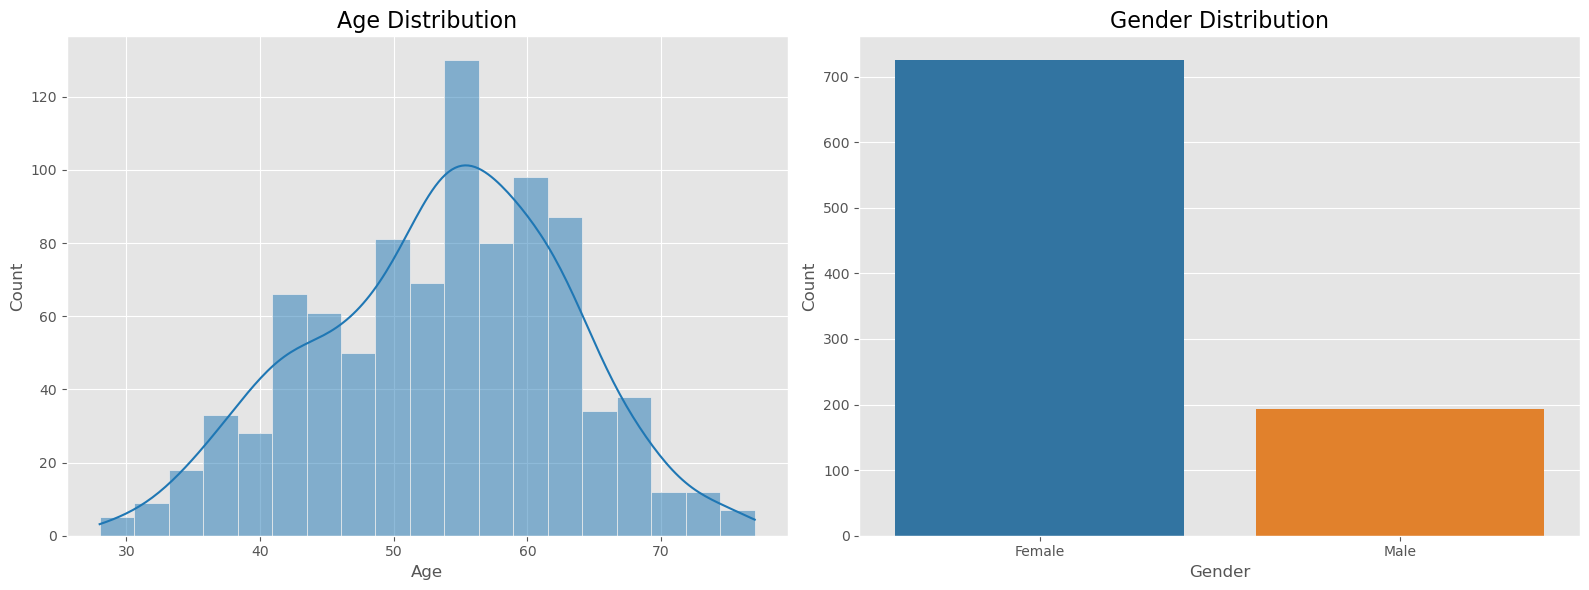

/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/3432567105.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType', data=df, ax=ax, palette=color_palette[:4])


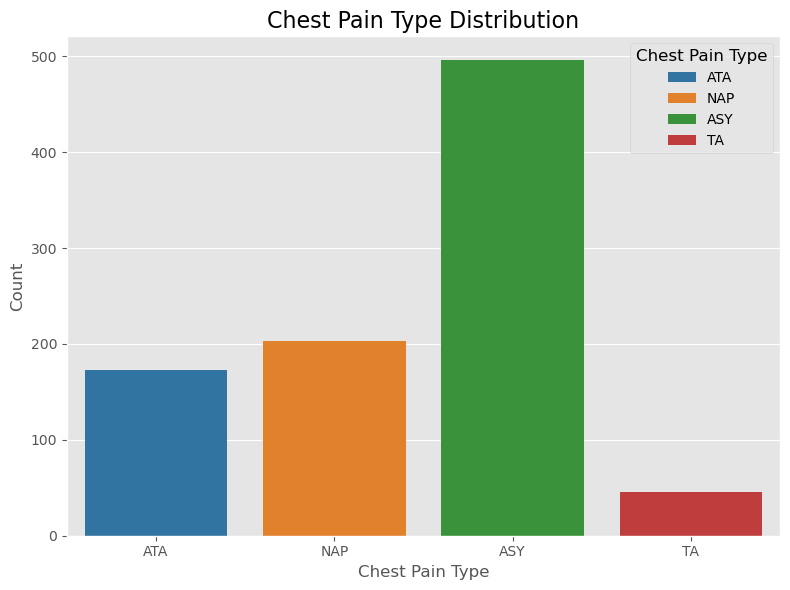

/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/3432567105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=df, ax=ax, palette=color_palette[:2])
/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/3432567105.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/3432567105.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=ax, palette=color_palette[:2])
/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/i

Text(0, 0.5, 'Resting BP')

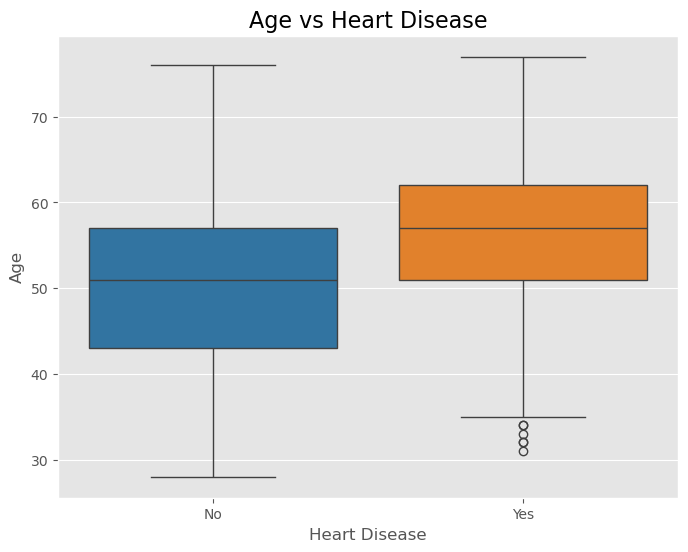

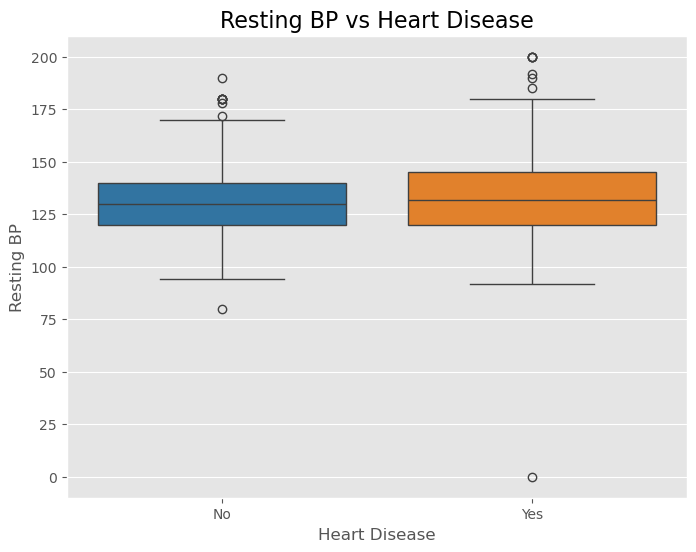

In [6]:
# Set a built-in Matplotlib style
plt.style.use('ggplot')

# Define a colorblind-friendly color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Age Distribution
sns.histplot(df['Age'], kde=True, ax=ax1, color=color_palette[0])
ax1.set_title('Age Distribution', fontsize=16)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Gender Distribution
sns.countplot(x='Sex', data=df, ax=ax2, palette=color_palette[:2])
ax2.set_title('Gender Distribution', fontsize=16)
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Female', 'Male'])

# Adjust layout and display
plt.tight_layout()
plt.show()

# Chest Pain Type Distribution
if 'ChestPainType' in df.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(x='ChestPainType', data=df, ax=ax, palette=color_palette[:4])
    ax.set_title('Chest Pain Type Distribution', fontsize=16)
    ax.set_xlabel('Chest Pain Type', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Chest Pain Type', labels=df['ChestPainType'].unique(), title_fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("'ChestPainType' column not found in the DataFrame.")

# Age vs Heart Disease
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df, ax=ax, palette=color_palette[:2])
ax.set_title('Age vs Heart Disease', fontsize=16)
ax.set_xlabel('Heart Disease', fontsize=12)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Age', fontsize=12)

# Resting BP vs Heart Disease
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=ax, palette=color_palette[:2])
ax.set_title('Resting BP vs Heart Disease', fontsize=16)
ax.set_xlabel('Heart Disease', fontsize=12)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Resting BP', fontsize=12)

/var/folders/ml/sgrl0zy97gdf902pd3ct59480000gn/T/ipykernel_5050/2903776692.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Female', 'Male'])


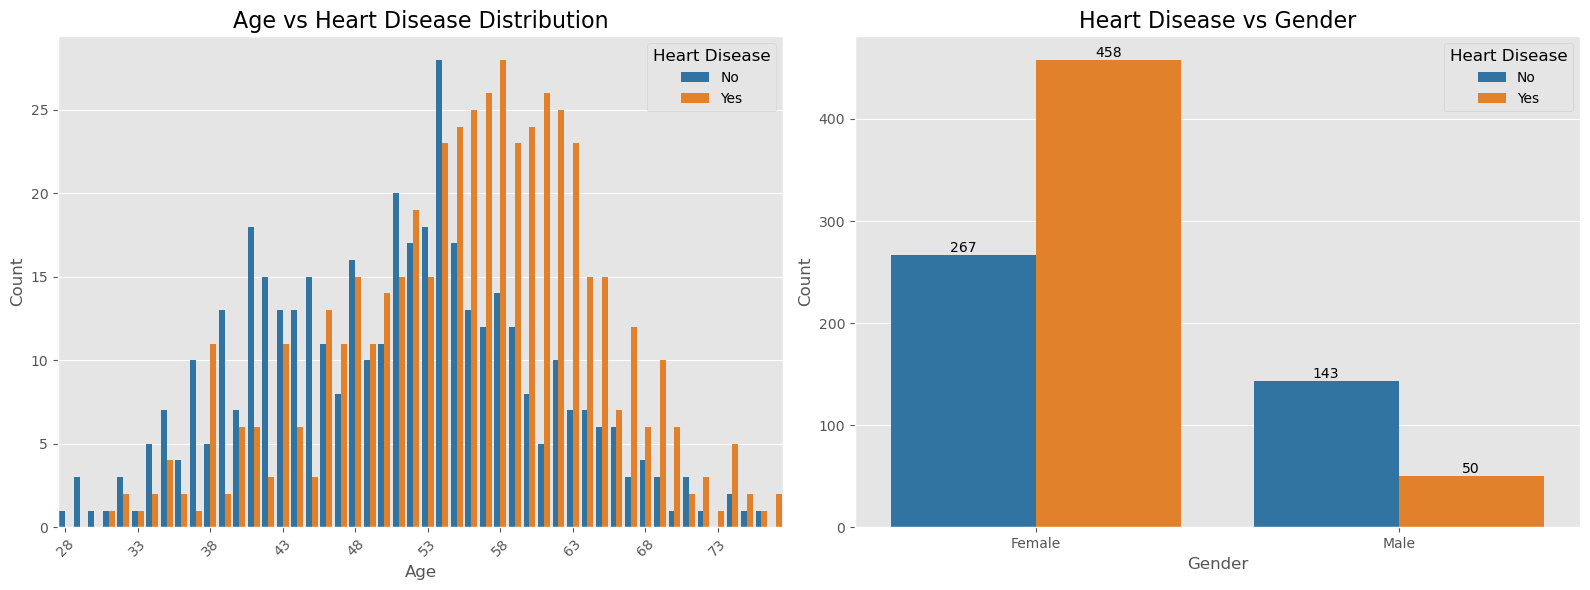

In [7]:
# Use Matplotlib style 
plt.style.use('ggplot')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Age vs Heart Disease Distribution
sns.countplot(x='Age', hue='HeartDisease', data=df, ax=ax1, 
              palette=['#1f77b4', '#ff7f0e'])  # Colorblind-friendly colors
ax1.set_title('Age vs Heart Disease Distribution', fontsize=16)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Heart Disease', labels=['No', 'Yes'], title_fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Improve x-axis readability by showing fewer ticks
ax1.set_xticks(ax1.get_xticks()[::5])

# Heart Disease vs Gender
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax2, palette=['#1f77b4', '#ff7f0e'])
ax2.set_title('Heart Disease vs Gender', fontsize=16)
ax2.set_xlabel('Gender', fontsize=12)
ax2.set_xticklabels(['Female', 'Male'])
ax2.set_ylabel('Count', fontsize=12)
ax2.legend(title='Heart Disease', labels=['No', 'Yes'], title_fontsize=12)

# Add value labels on top of each bar for heart disease vs gender 
for container in ax2.containers:
    ax2.bar_label(container, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

The graph consists of two subplots analyzing the relationship between age, gender, and heart disease.

1. **Age vs Heart Disease Distribution:**
   - The histogram shows counts of individuals with and without heart disease across different age groups.
   - People without heart disease (blue bars) tend to be more evenly distributed across ages, with some peaks around ages 48 and 55.
   - Those with heart disease (orange bars) are more concentrated around middle age, especially between ages 50 and 60, with a peak around age 55.
   - Generally, the occurrence of heart disease increases with age, with higher counts between ages 50-60.

2. **Heart Disease vs Gender:**
   - Males (represented by '1') have a significantly higher count (458) with heart disease compared to females (50).
   - The count of males without heart disease is 143.
   - This indicates a higher prevalence of heart disease among males compared to females in this dataset.

Overall, the data suggests:
- Heart disease prevalence increases with age.
- Males are more likely to have heart disease than females.

In [8]:
# Data preprocessing (Categorical values are encoded using mapping and one-hot encoding)

# Encode 'Sex' ('M'->1, 'F'->0)
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
else:
    print("Column 'Sex' not found.")

# Encode 'ExerciseAngina' ('Y'->1, 'N'->0)
if 'ExerciseAngina' in df.columns:
    df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
else:
    print("Column 'ExerciseAngina' not found.")

# Encode 'ChestPainType' into multiple columns, if it exists
if 'ChestPainType' in df.columns:
    df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)
else:
    print("Column 'ChestPainType' not found.")

# Encode 'RestingECG' ('Normal'->0, 'ST'->1, 'LVH'->2)
if 'RestingECG' in df.columns:
    df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
else:
    print("Column 'RestingECG' not found.")

# Encode 'ST_Slope' ('Up'->0, 'Flat'->1, 'Down'->2)
if 'ST_Slope' in df.columns:
    df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
else:
    print("Column 'ST_Slope' not found.")

In [9]:
#Perform Logistic Regression analysis
# Define X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

In [10]:
# Define hyperparameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [1000, 2000, 3000],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)


Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__solver': 'lbfgs'}
Accuracy: 0.8804347826086957
Confusion Matrix:
 [[68 14]
 [ 8 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Confusion Matrix:
[[68 14]
 [ 8 94]]

True Negatives (TN): 68 (correctly predicted no heart disease)
False Positives (FP): 14 (incorrectly predicted heart disease)
False Negatives (FN): 8 (incorrectly predicted no heart disease)
True Positives (TP): 94 (correctly predicted heart disease)

Classification Report:
For class 0 (No Heart Disease):
Precision: 0.89 (89% of predicted negatives are correct)
Recall: 0.83 (83% of actual negatives were identified)
F1-score: 0.86 

For class 1 (Heart Disease):
Precision: 0.87 (87% of predicted positives are correct)
Recall: 0.92 (92% of actual positives were identified)
F1-score: 0.90 

Overall:
Accuracy: 0.88 (88% overall correct predictions)
Macro avg: 0.88 (unweighted mean of per-class scores)
Weighted avg: 0.88 (weighted mean of per-class scores)

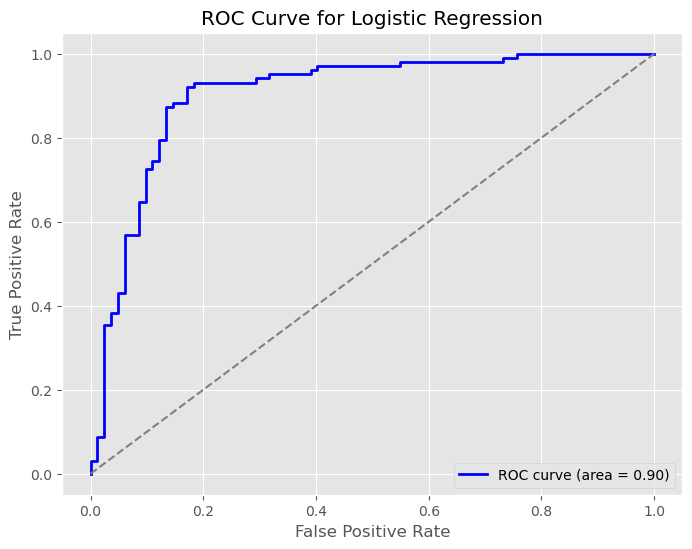

In [11]:
# Predict probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

- The blue line represents the performance of the model in distinguishing between the positive and negative classes across all thresholds.
- The area under the ROC curve (AUC) is approximately **0.90**, indicating that the model has excellent discriminative ability.
- An AUC close to 1.0 suggests the model is highly effective in ranking instances by their likelihood of having heart disease.


Feature Coefficients and Their Contribution to the Model:

              Feature  Coefficient  AbsCoefficient
9            ST_Slope     0.981649        0.981649
11  ChestPainType_NAP    -0.601644        0.601644
10  ChestPainType_ATA    -0.585600        0.585600
7      ExerciseAngina     0.485806        0.485806
3         Cholesterol    -0.387876        0.387876
1                 Sex     0.381327        0.381327
4           FastingBS     0.355968        0.355968
12   ChestPainType_TA    -0.249424        0.249424
6               MaxHR    -0.238199        0.238199
8             Oldpeak     0.230227        0.230227
5          RestingECG     0.106335        0.106335
2           RestingBP     0.051775        0.051775
0                 Age     0.028022        0.028022


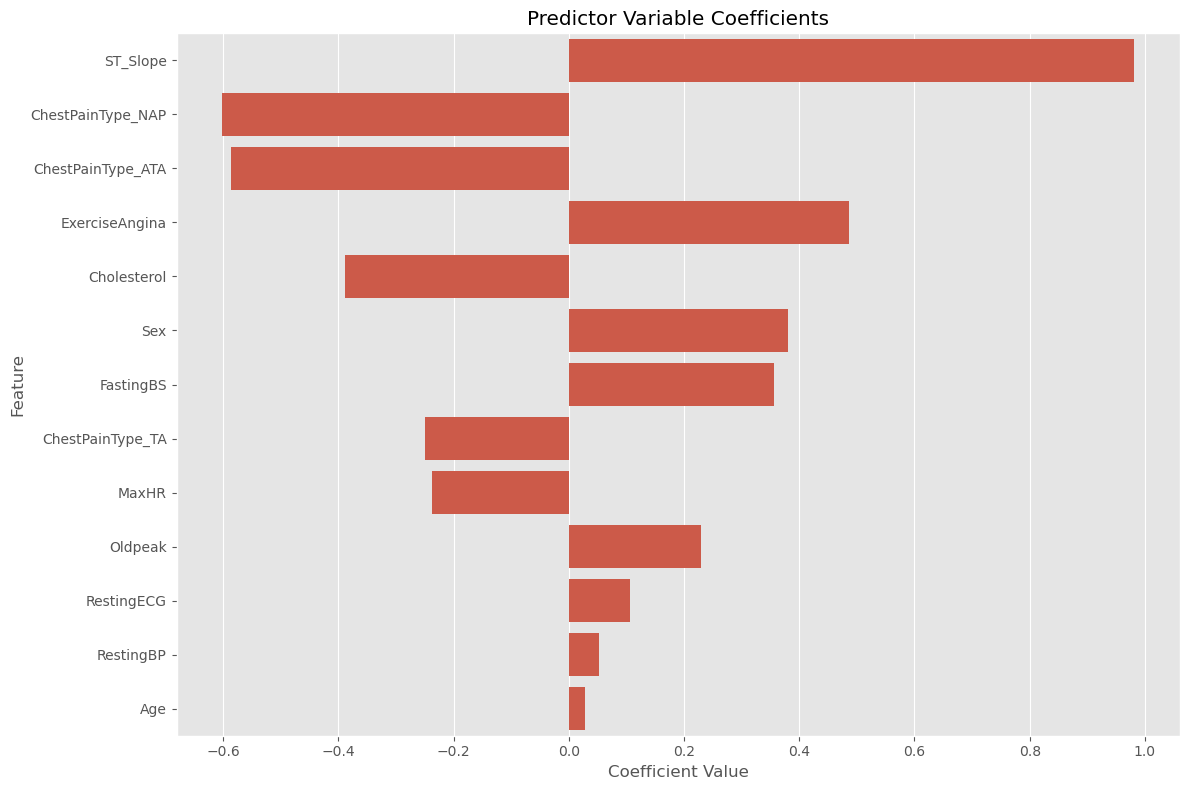

In [12]:
# Get feature names
feature_names = X.columns

# Get the coefficients (for the logistic regression model)
coefficients = best_model.named_steps['classifier'].coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value 
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print("\nFeature Coefficients and Their Contribution to the Model:\n")
print(coef_df)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Predictor Variable Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

This bar chart displays the coefficients of the predictor variables from the logistic regression model, illustrating their contribution to the prediction of heart disease.

### Interpretation:
- **Positive coefficients** (bars extending to the right) increase the likelihood of heart disease.
- **Negative coefficients** (bars extending to the left) decrease the likelihood.

### Key observations:
- **ST_Slope** has the strongest positive contribution, indicating that an upward or certain slope significantly increases the risk.
- **ChestPainType_NAP** and **ATA** (types of chest pain) also have large positive coefficients, suggesting they are important risk factors.
- **ExerciseAngina** has a notable positive impact, implying that exercising-induced chest pain is associated with higher heart disease risk.
- **Cholesterol** and **Age** contribute positively, aligning with clinical knowledge that higher cholesterol and older age increase risk.
- **RestingBP**, **RestingECG**, and other features have smaller contributions, but still influence the model.

### Negative coefficients:
- Features like **RestingBP**, **Oldpeak**, and possibly others with negative coefficients tend to decrease the probability of heart disease when their values are higher.

### Conclusion:
- Features with larger absolute coefficient values have a more significant impact on the model's predictions.
- The model emphasizes features related to chest pain types, ECG, slope, age, and cholesterol as important predictors for heart disease risk.